# Transfer Learning CIFAR10

* Train a simple convnet on the CIFAR dataset the first 5 output classes [0..4].
* Freeze convolutional layers and fine-tune dense layers for the last 5 ouput classes [5..9].


### 1. Import CIFAR10 data and create 2 datasets with one dataset having classes from 0 to 4 and other having classes from 5 to 9 

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from keras.datasets import cifar10
import os

Using TensorFlow backend.


In [2]:
batch_size = 32
epochs = 100
save_dir = os.path.join(os.getcwd(),'saved_models')
model_name = 'cifar_10_0to4.h5'

In [45]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [46]:
x_train.shape

(50000, 32, 32, 3)

In [47]:
y_train.shape

(50000, 1)

In [48]:
x_test.shape

(10000, 32, 32, 3)

In [49]:
y_test.shape

(10000, 1)

In [50]:
from matplotlib import pyplot as plt
%matplotlib inline

In [51]:
def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])

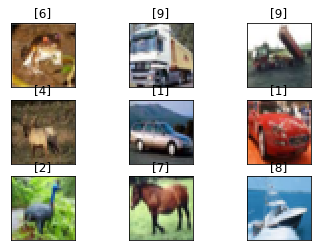

In [52]:
# Plot some training set images
plot_images(x_train, y_train, 3, 3)

In [53]:
import numpy as np

In [54]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

In [55]:
x1_train = []
x1_test = []
x2_train = []
x2_test = []
y1_train = []
y1_test = []
y2_train = []
y2_test = []

In [56]:
for i in range(len(x_train)):
    if y_train[i]<5:
        x1_train.append(x_train[i]/255.0)
        y1_train.append(y_train[i])
    else:
        x2_train.append(x_train[i]/255.0)
        y2_train.append(y_train[i])

In [57]:
for ix in range(y_test.shape[0]):
    if y_test[ix] < 5:
        
        x1_test.append(x_test[ix]/255.0)
        y1_test.append(y_test[ix])
    else:
        
        x2_test.append(x_test[ix]/255.0)
        y2_test.append(y_test[ix])

In [58]:
from keras.utils import to_categorical

In [59]:
x1_train = np.asarray(x1_train).reshape((-1,32,32,3))
x2_train = np.asarray(x2_train).reshape((-1,32,32,3))

In [60]:
x1_test = np.asarray(x1_test).reshape((-1, 32, 32, 3))
x2_test = np.asarray(x2_test).reshape((-1, 32, 32, 3))

In [61]:
np.unique(y1_train,return_counts=True)

(array([0, 1, 2, 3, 4], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000], dtype=int64))

In [62]:
np.unique(y2_train,return_counts=True)

(array([5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000], dtype=int64))

In [63]:
x1_train.shape

(25000, 32, 32, 3)

In [64]:
x2_train.shape

(25000, 32, 32, 3)

In [65]:
from keras.utils.np_utils import to_categorical

### 2. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [71]:
y1_train = keras.utils.np_utils.to_categorical(np.asarray(y1_train),5)
y1_test = keras.utils.np_utils.to_categorical(np.asarray(y1_test), 5)

y2_train= np.asarray(y2_train)-5
y2_test= np.asarray(y2_test)-5
y2_train = keras.utils.np_utils.to_categorical(y2_train,5)
y2_test = keras.utils.np_utils.to_categorical(y2_test, 5)

In [72]:
y1_train.shape

(25000, 5)

In [73]:
y2_train.shape

(25000, 5)

In [74]:
x1_train = np.asarray(x1_train).reshape((-1, 32, 32, 3))
x2_train = np.asarray(x2_train).reshape((-1, 32, 32, 3))

In [75]:
x1_train.shape

(25000, 32, 32, 3)

### 3. Build a sequential neural network model which can classify the classes 0 to 4 of CIFAR10 dataset with at least 80% accuracy on test data

In [78]:
num_classes=5
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='same',input_shape=(32,32,3),activation='relu',name='conv_1'))
model.add(Conv2D(32, (3, 3),activation='relu',name='conv_2'))
model.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))
model.add(Dropout((0.25),name='drop_1'))
model.add(Conv2D(64,(3, 3),padding='same',activation='relu',name='conv_3'))
model.add(Conv2D(64,(3, 3),activation='relu',name='conv_4'))
model.add(MaxPooling2D(pool_size=(2, 2),name='max_2'))
model.add(Dropout((0.25),name='drop_2'))
model.add(Flatten())
model.add(Dense((512),activation='relu',name='dense_1'))
model.add(Dropout((0.5),name='drop_3'))
model.add(Dense(num_classes,activation='softmax',name='dense_2'))

In [79]:
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

In [80]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

In [81]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [82]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv_2 (Conv2D)              (None, 30, 30, 32)        9248      
_________________________________________________________________
max_1 (MaxPooling2D)         (None, 15, 15, 32)        0         
_________________________________________________________________
drop_1 (Dropout)             (None, 15, 15, 32)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 15, 15, 64)        18496     
_________________________________________________________________
conv_4 (Conv2D)              (None, 13, 13, 64)        36928     
_________________________________________________________________
max_2 (MaxPooling2D)         (None, 6, 6, 64)          0         
__________

In [85]:
batch_size = 64
#Training on the dataset
model.fit(x1_train, y1_train,
          batch_size=batch_size,
          epochs=50,
          verbose=1,
          validation_data=(x1_test, y1_test))

Train on 25000 samples, validate on 5000 samples
Epoch 1/50
25000/25000 [==============================] - 12s 482us/step - loss: 1.3550 - acc: 0.4276 - val_loss: 1.1417 - val_acc: 0.5410
Epoch 2/50
25000/25000 [==============================] - 10s 409us/step - loss: 1.1073 - acc: 0.5483 - val_loss: 1.0044 - val_acc: 0.5904
Epoch 3/50
25000/25000 [==============================] - 11s 439us/step - loss: 1.0130 - acc: 0.5864 - val_loss: 0.9561 - val_acc: 0.6076
Epoch 4/50
25000/25000 [==============================] - 11s 448us/step - loss: 0.9510 - acc: 0.6164 - val_loss: 0.8749 - val_acc: 0.6556
Epoch 5/50
25000/25000 [==============================] - 11s 442us/step - loss: 0.9125 - acc: 0.6356 - val_loss: 0.9278 - val_acc: 0.6304
Epoch 6/50
25000/25000 [==============================] - 11s 453us/step - loss: 0.8755 - acc: 0.6525 - val_loss: 0.8076 - val_acc: 0.6850
Epoch 7/50
25000/25000 [==============================] - 11s 455us/step - loss: 0.8466 - acc: 0.6667 - val_loss: 0.8

### 4. In the model which was built above (for classification of classes 0-4 in CIFAR10), make only the dense layers to be trainable and conv layers to be non-trainable

In [40]:
for layer in model.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

### 5. Utilize the the model trained on CIFAR 10 (classes 0 to 4) to classify the classes 5 to 9 of CIFAR 10  (Use Transfer Learning) <br>
Achieve an accuracy of more than 85% on test data

In [86]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x2_train, y2_train,
          batch_size=128,
          epochs=15,
          verbose=1,
          validation_data=(x2_test, y2_test))

Train on 25000 samples, validate on 5000 samples
Epoch 1/15
25000/25000 [==============================] - 11s 447us/step - loss: 1.1307 - acc: 0.5480 - val_loss: 0.6991 - val_acc: 0.7518
Epoch 2/15
25000/25000 [==============================] - 9s 345us/step - loss: 0.6553 - acc: 0.7585 - val_loss: 0.4528 - val_acc: 0.8316
Epoch 3/15
25000/25000 [==============================] - 9s 350us/step - loss: 0.4925 - acc: 0.8185 - val_loss: 0.3813 - val_acc: 0.8656
Epoch 4/15
25000/25000 [==============================] - 9s 374us/step - loss: 0.4245 - acc: 0.8470 - val_loss: 0.3339 - val_acc: 0.8846
Epoch 5/15
25000/25000 [==============================] - 9s 378us/step - loss: 0.3764 - acc: 0.8640 - val_loss: 0.3031 - val_acc: 0.8908
Epoch 6/15
25000/25000 [==============================] - 9s 345us/step - loss: 0.3402 - acc: 0.8804 - val_loss: 0.3013 - val_acc: 0.8916
Epoch 7/15
25000/25000 [==============================] - 9s 341us/step - loss: 0.3090 - acc: 0.8887 - val_loss: 0.2879 - 

# Text classification using TF-IDF

### 6. Load the dataset from sklearn.datasets

In [1]:
from sklearn.datasets import fetch_20newsgroups

In [2]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

### 7. Training data

In [3]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

### 8. Test data

In [4]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

###  a.  You can access the values for the target variable using .target attribute 
###  b. You can access the name of the class in the target variable with .target_names


In [5]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2], dtype=int64)

In [6]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [7]:
twenty_train.data[0:5]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

### 9.  Now with dependent and independent data available for both train and test datasets, using TfidfVectorizer fit and transform the training data and test data and get the tfidf features for both

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(stop_words='english')
tfidf_train = tf.fit_transform(twenty_train.data)

In [9]:
tfidf_train.shape

(2257, 35482)

In [10]:
tf.get_feature_names()

['00',
 '000',
 '0000',
 '0000001200',
 '000005102000',
 '0001',
 '000100255pixel',
 '00014',
 '000406',
 '0007',
 '000usd',
 '0010',
 '001004',
 '0010580b',
 '001125',
 '001200201pixel',
 '0014',
 '001642',
 '00196',
 '002',
 '0028',
 '003258u19250',
 '0033',
 '0038',
 '0039',
 '004021809',
 '004158',
 '004627',
 '0049',
 '00500',
 '005148',
 '00630',
 '008561',
 '0094',
 '00am',
 '00index',
 '00pm',
 '01',
 '0100',
 '010116',
 '010702',
 '011255',
 '011308pxf3',
 '011605',
 '011720',
 '012019',
 '012536',
 '012946',
 '013',
 '013034',
 '0131',
 '013423tan102',
 '013657',
 '0138',
 '013846',
 '0150',
 '015518',
 '01580',
 '015931',
 '01720',
 '01752',
 '0179',
 '01821',
 '01830',
 '0184',
 '01852',
 '01854',
 '01890',
 '0195',
 '0199',
 '01a',
 '01wb',
 '02',
 '020',
 '0200',
 '020504',
 '020637',
 '020646',
 '020701tan102',
 '020751',
 '02115',
 '02118',
 '02139',
 '02142',
 '02154',
 '02160',
 '021635',
 '021708',
 '02173',
 '0223',
 '02254',
 '022621tan102',
 '023044',
 '0235',
 '0

In [11]:
tfidf_test = tf.transform(twenty_test.data)

### 10. Use logisticRegression with tfidf features as input and targets as output and train the model and report the train and test accuracy score

In [12]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(tfidf_train, twenty_train.target)

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
logreg.score(tfidf_test, twenty_test.target)*100

89.88015978695073

In [14]:
tfidf_pred = logreg.predict(tfidf_test)

In [16]:
import numpy as np
np.where(tfidf_pred==0) #predicting occurance/index of particular value. Here checking where 0 appears/predicted. 

(array([   3,    5,   18,   23,   29,   32,   35,   37,   41,   52,   54,
          67,   70,   76,   79,   81,   87,   96,  104,  111,  113,  119,
         121,  122,  129,  134,  148,  154,  159,  161,  163,  170,  177,
         185,  196,  216,  217,  227,  246,  264,  271,  275,  283,  297,
         304,  307,  324,  332,  334,  340,  358,  362,  365,  367,  377,
         380,  393,  403,  408,  410,  412,  414,  426,  437,  440,  456,
         458,  462,  469,  470,  477,  481,  482,  486,  490,  493,  498,
         525,  534,  539,  541,  542,  544,  547,  556,  559,  563,  579,
         590,  591,  608,  610,  611,  614,  617,  629,  639,  661,  664,
         668,  678,  682,  683,  694,  706,  716,  721,  722,  723,  729,
         733,  739,  755,  760,  766,  781,  789,  793,  794,  796,  798,
         804,  805,  808,  815,  818,  821,  822,  825,  829,  832,  833,
         838,  839,  857,  859,  865,  877,  879,  884,  887,  916,  919,
         920,  927,  932,  934,  951, 

In [17]:
twenty_test.target[52] #cross checking with the actual value. Checking the missclassified once

3

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(twenty_test.target,tfidf_pred) 
print(confusion_matrix)

[[235  16  18  50]
 [  1 384   3   1]
 [  3  33 353   7]
 [  6  12   2 378]]


In [19]:
import pandas as pd
pd.crosstab(tfidf_pred,twenty_test.target)

col_0,0,1,2,3
row_0,,,,
0,235,1,3,6
1,16,384,33,12
2,18,3,353,2
3,50,1,7,378


In [ ]:
#WE can see cross tab and confusion matrix are nothing but transpose of each other